# SVM

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

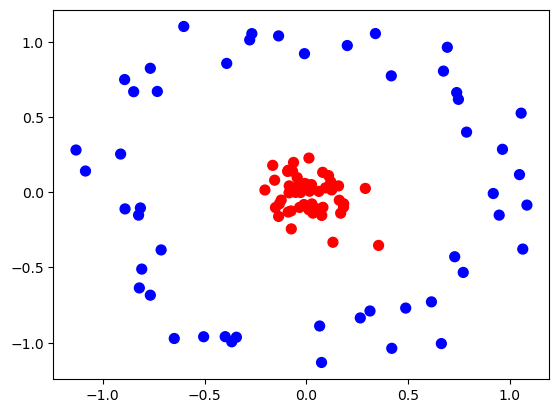

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [14]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

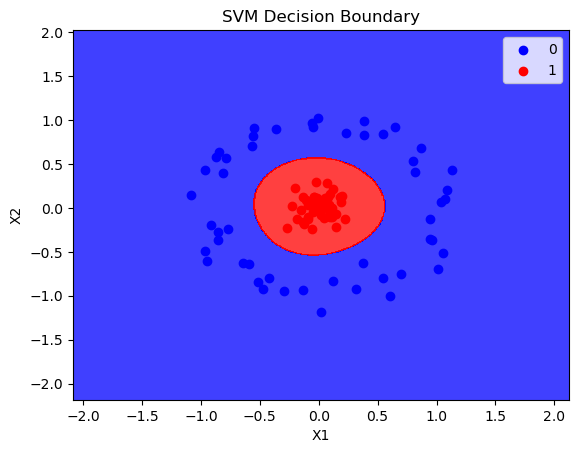

In [15]:
plot_decision_boundary(X, y, classifier)

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

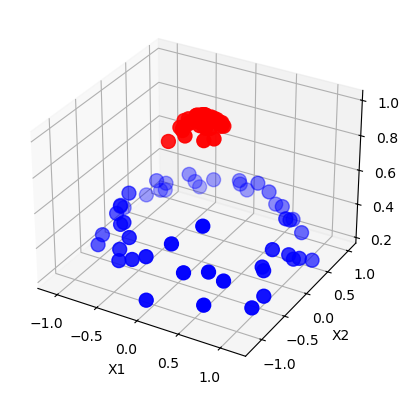

In [16]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
plot_3d_plot(X,y)

In [17]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

1.0

In [21]:
X_new=np.exp(-(X**2))

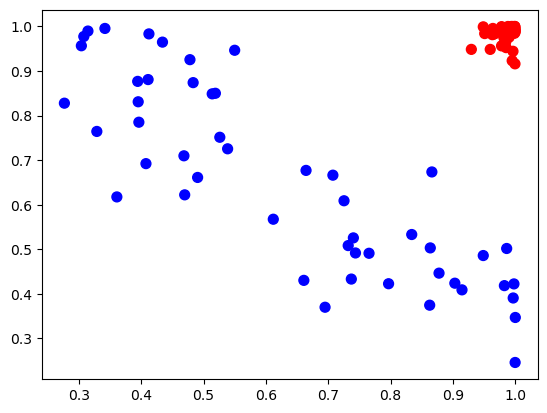

In [23]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')
plt.show()